# Linear regression using Keras
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

Load in the libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
#plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,5)

np.random.seed(42)

#===========================================================================
# Keras imports
#===========================================================================
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

## Create some synthetic data

In [2]:
# our ground truth "beta" parameters
b1 =  17
b0 =  10
X = np.arange(-5, 1, 0.1)

# set a random seed
np.random.seed(42)

# store our data in a pandas dataframe
df = pd.DataFrame(X, columns = ['X'])

# ground truth without noise
# df["gt"] = b3*df["x"]**3  + b2*df["x"]**2 + b1*df["x"] + b0
df["gt"] =  b1*df["X"] + b0

# add some random noise to make the data amore interesting
jitter = 5*(np.random.randn(60)-0.5)

df["y"] = df["gt"]+jitter

df.head()

,X,gt,y
0,-5.0,-75.0,-75.016429
1,-4.9,-73.3,-76.491322
2,-4.8,-71.6,-70.861557
3,-4.7,-69.9,-64.784851
4,-4.6,-68.2,-71.870767


## Scale the data

In [3]:
# para una red nuronal es importante a escalar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

## Our model

In [4]:
#===========================================================================
# build the keras model
#===========================================================================
model = Sequential()

n_neurons = 1
model.add(Dense(n_neurons, activation=None))

#===========================================================================
# compile the keras model
#===========================================================================
# solve using stochastic gradient descent (SGD)
model.compile(loss= 'mean_squared_error',
              optimizer= keras.optimizers.SGD(learning_rate=0.3)) # 0.01 is the default value

## Fit the data

In [5]:
#===========================================================================
# fit or "train" the model
#===========================================================================
model.fit(X_scaled.reshape(-1, 1), df["y"],
          epochs  = 10,
          verbose =  0)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Predict

In [6]:
#===========================================================================
# make predictions
#===========================================================================
df["y_NN"]  = model.predict(X_scaled.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


## Results

In [7]:
# also calculate and overlay the OLS fit
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_scaled.reshape(-1, 1), df["y"])
df["y_pred_OLS"] = regressor.coef_ * X_scaled + regressor.intercept_

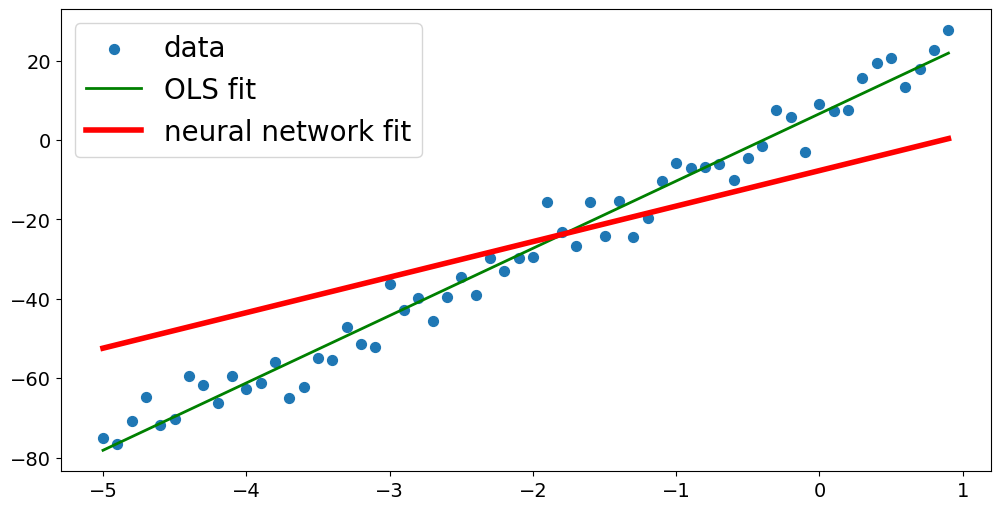

In [8]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(X,df["y"], s=50, label='data')
plt.plot(X, df["y_pred_OLS"], color="green", lw=2, label='OLS fit')
plt.plot(X, df["y_NN"], color="red", lw=4, label='neural network fit')
plt.legend(loc='upper left', fontsize=20);